In [1]:
import pandas as pd 
from pathlib import Path 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

In [2]:
# Suppress FutureWarning messages
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# variable "country_continent_csv" is assigned to the Path object, representing the file path to 'countryContinent.csv'
# variable "global_inflation_csv" is assigned to the Path object, representing the file path to 'Global_Dataset_of_Inflation.csv'

country_continent_csv = Path("Resources/country_continent.csv")
global_inflation_csv = Path("Resources/global_dataset_of_inflation.csv")

country_continent = pd.read_csv(country_continent_csv, encoding="Latin1")
global_inflation = pd.read_csv(global_inflation_csv, encoding="Latin1")

country_continent.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [4]:
global_inflation.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


In [5]:
# Finding the names of the columns from country_continent variable

country_continent.columns

Index(['country', 'code_2', 'code_3', 'country_code', 'iso_3166_2',
       'continent', 'sub_region', 'region_code', 'sub_region_code'],
      dtype='object')

In [6]:
# Finding the names of the columns from global_inflation variable 

global_inflation.columns

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Note', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'],
      dtype='object')

In [7]:
# Establishing the columns for country_continent_df 

country_continent_df = country_continent[["code_3", "country", "continent", "sub_region"]]

country_continent_df.head()

,code_3,country,continent,sub_region
0,AFG,Afghanistan,Asia,Southern Asia
1,ALA,Åland Islands,Europe,Northern Europe
2,ALB,Albania,Europe,Southern Europe
3,DZA,Algeria,Africa,Northern Africa
4,ASM,American Samoa,Oceania,Polynesia


In [8]:
# Establishing the columns for global_inflation_df 

global_inflation_df = global_inflation[["Country Code", "Series Name", "2002", "2003", "2004", "2005", "2006", "2007", "2008",
                                         "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018",
                                         "2019", "2020", "2021", "2022"]]

global_inflation_df.head()

,Country Code,Series Name,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Headline Consumer Price Inflation,3.32,3.66,2.53,3.40,3.61,5.39,8.96,-2.14,...,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04
1,AFG,Headline Consumer Price Inflation,51.93,35.66,16.36,10.57,6.78,8.68,26.42,-6.81,...,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN
2,AGO,Headline Consumer Price Inflation,108.89,98.22,43.53,22.96,13.31,12.25,12.47,13.72,...,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35
3,ALB,Headline Consumer Price Inflation,5.18,2.38,2.83,2.36,2.41,2.91,3.41,2.29,...,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73
4,ARE,Headline Consumer Price Inflation,2.92,3.12,5.04,6.20,9.28,11.13,12.27,1.57,...,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22


In [9]:
# Renaming columns for country_continent_df only 

country_continent_df = country_continent_df.rename(columns={"code_3": "Country Code",
                                                           "country": "Country",
                                                           "continent": "Continent",
                                                            "sub_region": "Sub Region"
                                                           })

country_continent_df

,Country Code,Country,Continent,Sub Region
0,AFG,Afghanistan,Asia,Southern Asia
1,ALA,Åland Islands,Europe,Northern Europe
2,ALB,Albania,Europe,Southern Europe
3,DZA,Algeria,Africa,Northern Africa
4,ASM,American Samoa,Oceania,Polynesia
...,...,...,...,...
244,WLF,Wallis and Futuna,Oceania,Polynesia
245,ESH,Western Sahara,Africa,Northern Africa
246,YEM,Yemen,Asia,Western Asia
247,ZMB,Zambia,Africa,Eastern Africa


In [10]:
# Finding missing values 

country_continent_df.count()

Country Code    249
Country         249
Continent       240
Sub Region      240
dtype: int64

In [11]:
# Finding missing values

global_inflation_df.count()

Country Code    783
Series Name     783
2002            625
2003            629
2004            634
2005            646
2006            661
2007            671
2008            680
2009            686
2010            693
2011            687
2012            696
2013            715
2014            734
2015            735
2016            746
2017            737
2018            737
2019            728
2020            719
2021            706
2022            665
dtype: int64

In [12]:
# Dropping all rows with missing information

global_inflation_df = global_inflation_df.dropna(how='any')

In [13]:
global_inflation_df.count()

Country Code    539
Series Name     539
2002            539
2003            539
2004            539
2005            539
2006            539
2007            539
2008            539
2009            539
2010            539
2011            539
2012            539
2013            539
2014            539
2015            539
2016            539
2017            539
2018            539
2019            539
2020            539
2021            539
2022            539
dtype: int64

In [14]:
# merging data 

global_inflation_by_continent_df = pd.merge(country_continent_df, global_inflation_df, how="right", on="Country Code")
global_inflation_by_continent_df

,Country Code,Country,Continent,Sub Region,Series Name,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Aruba,Americas,Caribbean,Headline Consumer Price Inflation,3.32,3.66,2.53,3.40,3.61,...,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04
1,AGO,Angola,Africa,Middle Africa,Headline Consumer Price Inflation,108.89,98.22,43.53,22.96,13.31,...,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35
2,ALB,Albania,Europe,Southern Europe,Headline Consumer Price Inflation,5.18,2.38,2.83,2.36,2.41,...,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73
3,ARE,United Arab Emirates,Asia,Western Asia,Headline Consumer Price Inflation,2.92,3.12,5.04,6.20,9.28,...,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22
4,ARG,Argentina,Americas,South America,Headline Consumer Price Inflation,25.87,13.44,4.42,9.64,10.90,...,10.62,38.08,26.54,39.40,25.68,34.28,53.55,42.02,48.41,72.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,TUR,Turkey,Asia,Western Asia,Producer Price Inflation,50.11,22.67,14.56,5.89,8.30,...,4.48,10.25,5.28,4.30,15.82,27.01,17.56,12.14,43.86,130.85
535,UKR,Ukraine,Europe,Eastern Europe,Producer Price Inflation,3.05,7.71,20.32,16.71,9.49,...,-0.05,17.17,35.69,20.92,26.45,17.58,4.14,-1.88,40.82,61.05
536,URY,Uruguay,Americas,South America,Producer Price Inflation,31.93,38.92,14.69,-2.57,5.92,...,3.94,10.41,6.83,3.35,1.67,9.67,12.78,10.46,14.42,14.19
537,USA,United States of America,Americas,Northern America,Producer Price Inflation,-2.29,5.35,6.18,7.32,4.67,...,1.36,1.58,-0.87,0.42,2.33,2.90,1.69,-2.12,8.95,7.91


In [15]:
# Creating CSV file for the merged df 

global_inflation_by_continent_df.to_csv('Output/global_inflation_by_continent.csv', index=False, header=True)

In [16]:
# Finding the different Series names 

global_inflation_df['Series Name'].unique()

array(['Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'Producer Price Inflation'], dtype=object)

In [17]:
# Creating 6 different DataFrames that separate the data by Series Name 
# DataFrame 1: Energy consumer price inflation (Series Name), country_code, country, continent, subregion, years
# DataFrame 2: Food consumer price inflation (Series Name), country_code, country, continent, subregion, years
# DataFrame 3: Headline consumer price inflation (Series Name), country_code, country, continent, subregion, years
# DataFrame 4: Offical core consumer price inflation (Series Name), country_code, country, continent, subregion, years
# DataFrame 5: Producer price inflation (Series Name), country_code, country, continent, subregion, years
# DataFrame 6: country_code, country, continent, subregion


# DATAFRAME 1: Energy Consumer Price Inflation 

# Selecting the columns needed for the df 
energy_consumer_df = global_inflation_by_continent_df[(global_inflation_by_continent_df["Series Name"] == "Energy Consumer Price Inflation")]
[["Country Code", "Country", "Continent", "Sub Region", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013",
  "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]

# Dropping the Series Name given that the power point would have the title 
energy_consumer_df = energy_consumer_df.drop(columns=["Series Name"])

# Dropping any missing values 
energy_consumer_df = energy_consumer_df.dropna(how='any')

# Resetting the index 
energy_consumer_df = energy_consumer_df.reset_index(drop=True)

energy_consumer_df.head()

,Country Code,Country,Continent,Sub Region,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Aruba,Americas,Caribbean,3.87,5.51,2.08,6.69,7.43,5.51,...,-7.46,1.57,3.80,-2.47,-3.20,0.80,1.23,-1.28,1.26,5.38
1,ALB,Albania,Europe,Southern Europe,11.90,4.50,27.20,25.00,5.70,7.10,...,0.24,1.33,-0.52,0.04,1.00,2.80,0.69,1.42,2.70,15.73
2,AUS,Australia,Oceania,Australia and New Zealand,3.25,4.29,4.01,3.82,3.34,4.08,...,4.67,3.04,2.54,1.68,2.89,2.35,-1.21,-0.12,10.93,16.93
3,AUT,Austria,Europe,Western Europe,0.85,1.34,3.56,5.43,4.28,4.63,...,2.39,1.59,1.19,0.83,1.73,2.28,0.90,2.40,12.25,40.14
4,BDI,Burundi,Africa,Eastern Africa,3.37,3.90,4.04,10.29,8.12,10.81,...,6.37,6.96,3.69,0.97,7.41,10.83,7.41,5.06,7.82,10.69


In [18]:
# Verifying there are no missing values for DataFrame #1

energy_consumer_df.count()

Country Code    103
Country         103
Continent       103
Sub Region      103
2002            103
2003            103
2004            103
2005            103
2006            103
2007            103
2008            103
2009            103
2010            103
2011            103
2012            103
2013            103
2014            103
2015            103
2016            103
2017            103
2018            103
2019            103
2020            103
2021            103
2022            103
dtype: int64

In [19]:
# Descriptive statistics for DataFrame #1

energy_consumer_df.describe().round(2)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,...,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00
mean,6.68,7.31,5.80,7.17,7.68,6.60,9.58,2.88,5.29,6.51,...,3.81,3.58,1.99,2.11,4.22,924.31,174.20,1.20,18.84,20.03
std,9.36,9.13,5.97,5.84,5.54,6.79,7.06,7.05,4.94,5.05,...,4.48,5.75,5.81,5.04,11.05,9340.77,1742.56,5.00,111.64,24.87
min,-3.10,-4.84,-10.64,-2.37,-0.02,-2.17,-16.00,-21.94,-12.76,-12.40,...,-7.46,-8.41,-14.80,-9.50,-3.20,-3.90,-2.98,-9.50,-5.08,-1.97
25%,1.35,2.56,2.04,3.53,4.44,2.30,4.80,-0.71,2.42,3.10,...,0.96,1.12,-0.86,-0.52,1.22,2.02,0.16,-1.15,2.28,5.28
50%,3.69,4.50,4.14,6.00,6.12,4.39,8.57,2.06,4.54,5.78,...,2.83,2.85,1.19,1.16,2.20,3.06,1.40,0.67,6.41,12.10
75%,8.10,8.50,8.20,8.94,10.09,9.10,13.90,7.12,8.68,8.60,...,5.24,4.97,4.07,3.82,4.90,5.30,3.88,2.60,11.16,27.22
max,46.74,60.82,27.20,26.52,31.40,33.86,29.37,19.62,20.67,20.87,...,20.54,46.97,25.48,30.67,109.58,94802.37,17687.47,23.88,1137.51,164.09


     Country  2019  2020   2021   2022
0      Aruba  1.23 -1.28   1.26   5.38
1    Albania  0.69  1.42   2.70  15.73
2  Australia -1.21 -0.12  10.93  16.93
3    Austria  0.90  2.40  12.25  40.14
4    Burundi  7.41  5.06   7.82  10.69


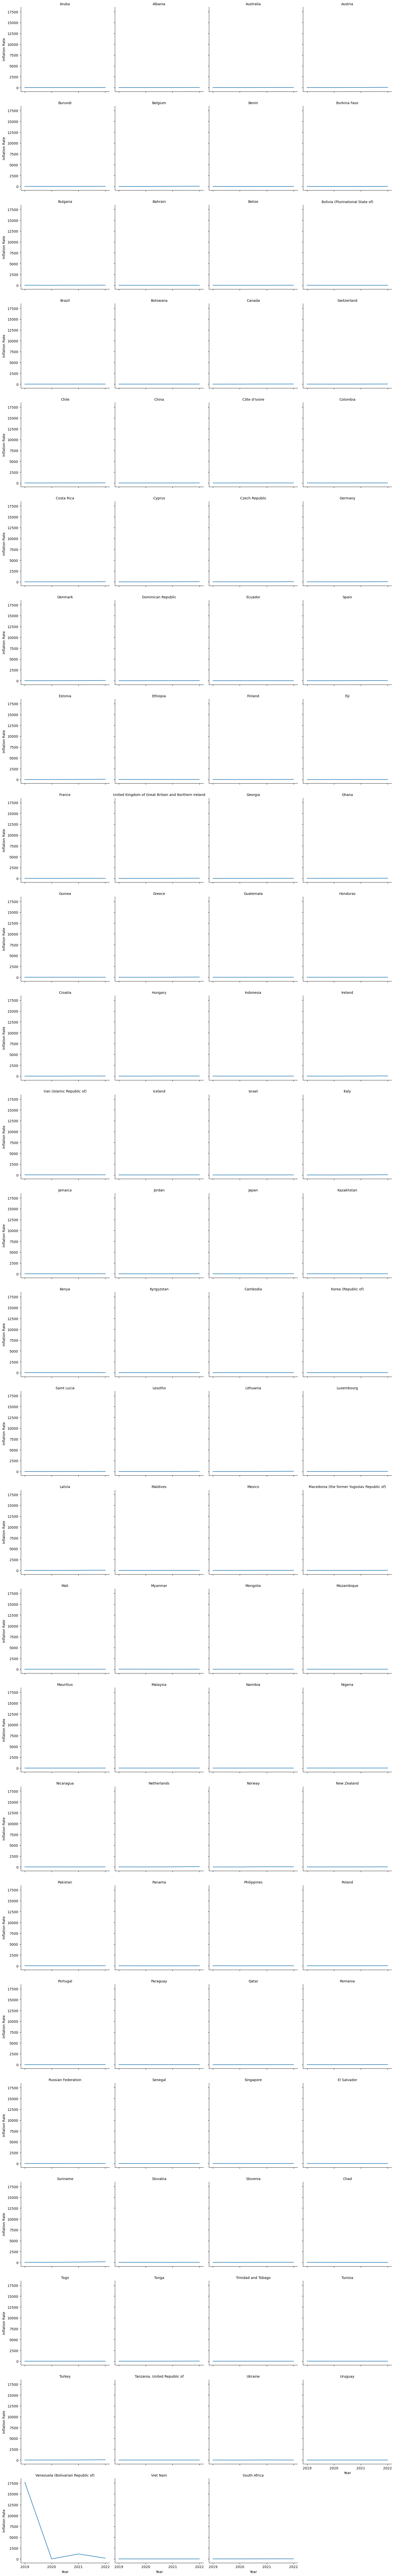

In [20]:
# This code will not be used for the presentation. It provides data visualization of the energy consumer inflation data.
# This analysis is for each country from 2019 to 2020.

import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the columns needed from energy_consumer_df
energy_consumer_df2 = energy_consumer_df[["Country","2019", "2020", "2021", "2022"]]

# Dropping any missing values
energy_consumer_df2 = energy_consumer_df2.dropna(how='any')

# Resetting the index
energy_consumer_df2 = energy_consumer_df2.reset_index(drop=True)

# Print the first few rows to check the dataframe
print(energy_consumer_df2.head())

# Melt the DataFrame to long format
data_long = energy_consumer_df2.melt(id_vars='Country', var_name='Year', value_name='Inflation Rate')

# Plot with facets
g = sns.FacetGrid(data_long, col='Country', col_wrap=4, height=4)
g.map_dataframe(sns.lineplot, x='Year', y='Inflation Rate')
g.set_axis_labels('Year', 'Inflation Rate')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()


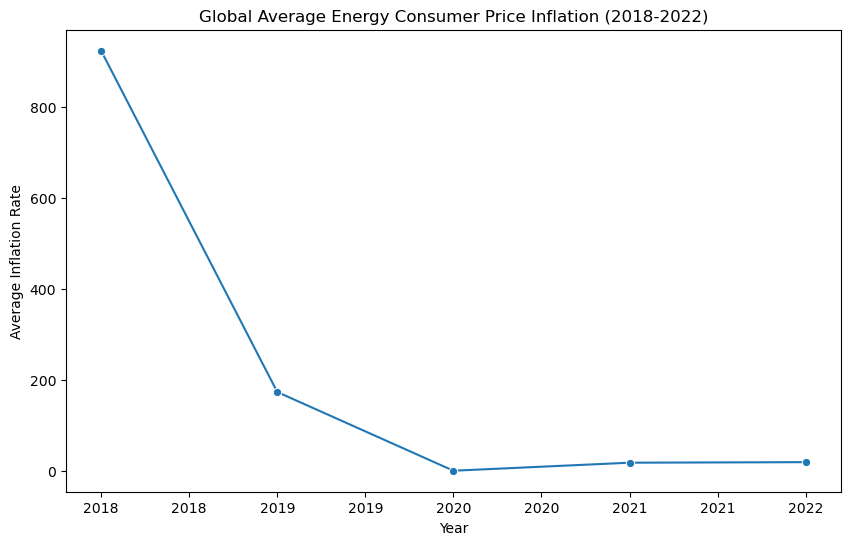

In [21]:
# Line chart for the average energy consumer price inflation of DataFrame #1
# The data visualization is only from 2018 to 2022 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Selecting the columns needed from energy_consumer_df 
energy_consumer_df = energy_consumer_df[["2018", "2019", "2020", "2021", "2022"]]

# Dropping any missing values 
energy_consumer_df = energy_consumer_df.dropna(how='any')

# Resetting the index 
energy_consumer_df = energy_consumer_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = energy_consumer_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Average Energy Consumer Price Inflation (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()



In [22]:
# DATAFRAME 2: Food Consumer Price Inflation

# Selecting the columns needed for the df 
food_consumer_df = global_inflation_by_continent_df[(global_inflation_by_continent_df["Series Name"] == "Food Consumer Price Inflation")]
[["Country Code", "Country", "Continent", "Sub Region", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013",
  "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]

# Dropping the Series Name given that the power point would have the title 
food_consumer_df = food_consumer_df.drop(columns=["Series Name"])

# Dropping any missing values 
food_consumer_df = food_consumer_df.dropna(how='any')

# Resetting the index 
food_consumer_df = food_consumer_df.reset_index(drop=True)

food_consumer_df.head()

,Country Code,Country,Continent,Sub Region,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ALB,Albania,Europe,Southern Europe,6.30,4.30,-0.10,-0.50,1.00,2.99,...,4.24,2.20,4.32,3.25,3.91,2.67,2.91,3.61,3.90,11.42
1,ARM,Armenia,Asia,Western Asia,2.20,6.90,10.00,0.80,4.10,6.70,...,5.81,0.51,27.85,-22.03,3.99,2.34,1.87,0.27,11.21,13.31
2,AUS,Australia,Oceania,Australia and New Zealand,3.57,3.65,2.34,2.38,7.79,2.33,...,0.80,2.54,0.92,0.82,0.71,0.97,4.48,9.28,7.91,7.03
3,AUT,Austria,Europe,Western Europe,1.34,1.79,1.92,1.24,1.88,4.21,...,3.47,1.94,0.83,0.73,2.37,1.52,1.02,2.33,0.78,10.23
4,AZE,Azerbaijan,Asia,Western Asia,3.70,3.30,10.00,10.90,12.00,16.30,...,2.32,0.90,6.07,14.75,16.52,1.78,3.69,4.81,8.16,20.07


In [23]:
# Verifying there are no missing values  for DataFrame #2

food_consumer_df.count()

Country Code    128
Country         128
Continent       128
Sub Region      128
2002            128
2003            128
2004            128
2005            128
2006            128
2007            128
2008            128
2009            128
2010            128
2011            128
2012            128
2013            128
2014            128
2015            128
2016            128
2017            128
2018            128
2019            128
2020            128
2021            128
2022            128
dtype: int64

In [24]:
# Descriptive statistics for DataFrame #2 

food_consumer_df.describe().round(2)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,128.00,128.00,128.00,128.00,128.00,128.00,128.00,128.00,128.00,128.00,...,128.00,128.00,128.00,128.00,128.00,128.00,128.00,128.00,128.00,128.00
mean,6.46,8.20,8.42,7.53,13.56,64.82,71.88,5.21,4.41,7.83,...,4.76,3.73,5.54,4.78,7.66,302.94,142.77,26.64,21.34,14.45
std,13.88,34.53,33.28,20.41,91.10,651.27,650.68,6.38,5.44,8.07,...,6.90,8.41,19.86,19.77,42.70,3392.61,1565.07,202.43,170.83,19.51
min,-5.72,-6.10,-7.00,-6.87,-1.98,-11.07,-0.78,-15.08,-4.56,-3.25,...,-3.28,-4.35,-3.80,-22.03,-4.15,-10.99,-6.43,-2.38,-4.15,-0.70
25%,1.18,1.12,0.91,1.58,2.02,3.25,7.88,1.25,1.02,3.98,...,1.84,0.00,0.71,0.06,0.54,0.86,1.03,1.89,1.26,6.73
50%,3.26,3.20,3.94,3.62,4.68,6.38,12.93,4.11,3.08,6.10,...,3.58,2.53,2.46,1.60,2.60,2.14,2.77,3.44,3.80,11.06
75%,6.38,6.93,8.11,9.38,7.45,10.90,17.77,8.34,6.22,8.95,...,5.47,5.33,5.68,5.55,5.62,3.79,4.86,6.43,7.52,15.65
max,135.10,386.40,369.50,223.90,1034.20,7375.30,7375.30,27.96,32.97,62.22,...,54.15,86.73,218.67,217.74,482.70,38386.00,17710.79,2220.00,1934.56,193.71


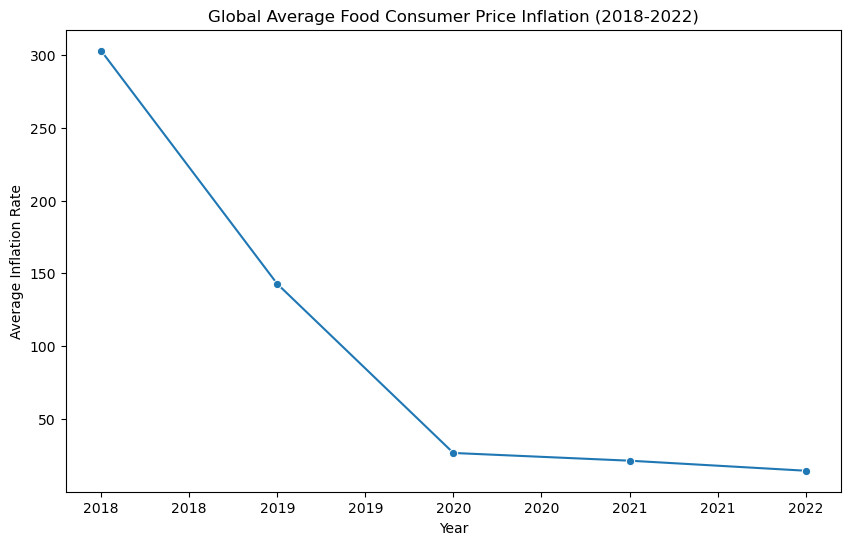

In [25]:
# Line chart for the average energy consumer price inflation of DataFrame #2
# The data visualization is only from 2018 to 2022 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Selecting the columns needed from energy_consumer_df 
food_consumer_df = food_consumer_df[["2018", "2019", "2020", "2021", "2022"]]

# Dropping any missing values 
food_consumer_df = food_consumer_df.dropna(how='any')

# Resetting the index 
food_consumer_df = food_consumer_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = food_consumer_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Average Food Consumer Price Inflation (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()

In [26]:
# DATAFRAME 3: Headline Consumer Price Inflation

# Selecting the columns needed for the df 
headline_consumer_df = global_inflation_by_continent_df[(global_inflation_by_continent_df["Series Name"] == "Headline Consumer Price Inflation")]
[["Country Code", "Country", "Continent", "Sub Region", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013",
  "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]

# Dropping the Series Name given that the power point would have the title 
headline_consumer_df = headline_consumer_df.drop(columns=["Series Name"])

# Dropping any missing values 
headline_consumer_df = headline_consumer_df.dropna(how='any')

# Resetting the index 
headline_consumer_df = headline_consumer_df.reset_index(drop=True)

headline_consumer_df.head()

,Country Code,Country,Continent,Sub Region,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Aruba,Americas,Caribbean,3.32,3.66,2.53,3.40,3.61,5.39,...,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04
1,AGO,Angola,Africa,Middle Africa,108.89,98.22,43.53,22.96,13.31,12.25,...,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35
2,ALB,Albania,Europe,Southern Europe,5.18,2.38,2.83,2.36,2.41,2.91,...,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73
3,ARE,United Arab Emirates,Asia,Western Asia,2.92,3.12,5.04,6.20,9.28,11.13,...,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22
4,ARG,Argentina,Americas,South America,25.87,13.44,4.42,9.64,10.90,8.83,...,10.62,38.08,26.54,39.40,25.68,34.28,53.55,42.02,48.41,72.43


In [27]:
# Verifying there are no missing values  for DataFrame #3

headline_consumer_df.count()

Country Code    185
Country         185
Continent       185
Sub Region      185
2002            185
2003            185
2004            185
2005            185
2006            185
2007            185
2008            185
2009            185
2010            185
2011            185
2012            185
2013            185
2014            185
2015            185
2016            185
2017            185
2018            185
2019            185
2020            185
2021            185
2022            185
dtype: int64

In [28]:
# Descriptive statistics for DataFrame #3 

headline_consumer_df.describe().round(2)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00,...,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00,185.00
mean,6.17,6.14,6.14,5.84,6.15,5.66,10.92,4.64,4.46,6.35,...,4.36,4.10,4.15,5.30,6.86,357.62,112.73,112.38,17.19,14.88
std,11.52,9.71,10.47,6.10,6.12,7.69,12.69,6.26,4.28,5.98,...,5.66,6.72,10.58,19.70,32.52,4806.09,1463.27,1267.33,119.96,31.07
min,-34.44,-8.56,-4.80,-31.52,-1.86,-72.73,1.38,-4.88,-3.90,-0.37,...,-2.37,-1.41,-3.75,-3.09,-13.31,-14.40,-16.36,-2.60,-3.01,1.05
25%,1.59,1.58,1.75,2.36,2.50,2.46,5.33,0.77,1.53,3.20,...,1.41,0.68,0.13,0.19,1.16,1.37,0.88,0.51,1.92,5.66
50%,2.96,3.23,3.66,4.12,4.41,4.84,8.72,3.34,3.53,4.80,...,2.72,2.56,1.84,1.72,2.37,2.47,2.24,2.42,3.48,8.00
75%,7.71,7.50,7.44,8.28,8.23,8.29,12.47,7.06,6.26,7.65,...,5.74,5.68,4.95,5.43,5.32,4.34,4.30,4.91,6.05,12.72
max,108.89,98.22,113.57,36.96,53.25,30.93,156.96,46.10,28.17,53.17,...,40.59,62.14,121.40,254.39,438.12,65374.08,19906.02,17087.72,1588.51,284.94


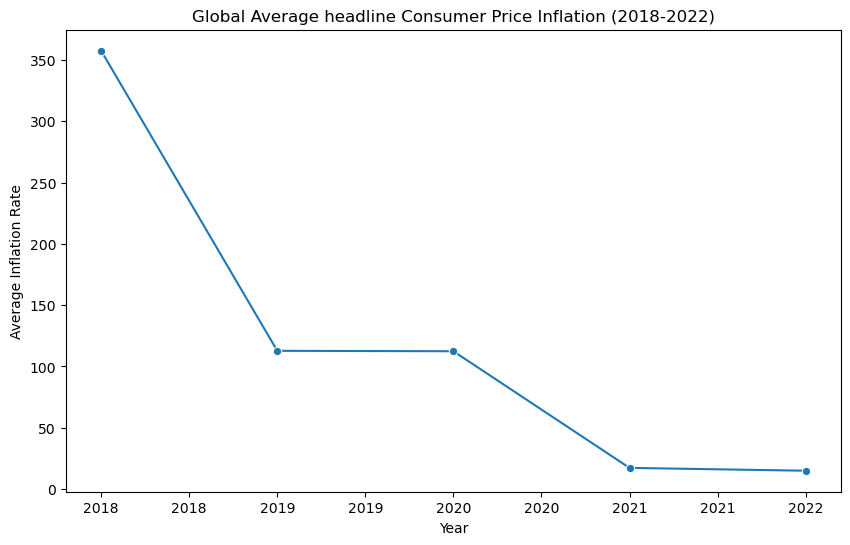

In [29]:
# Line chart for the average energy consumer price inflation of DataFrame #3
# The data visualization is only from 2018 to 2022 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Selecting the columns needed from energy_consumer_df 
headline_consumer_df = headline_consumer_df[["2018", "2019", "2020", "2021", "2022"]]

# Dropping any missing values 
headline_consumer_df = headline_consumer_df.dropna(how='any')

# Resetting the index 
headline_consumer_df = headline_consumer_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = headline_consumer_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Average headline Consumer Price Inflation (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()

In [30]:
# DATAFRAME 4: Official Core Consumer Price Inflation 

# Selecting the columns needed for the df 
official_core_consumer_df = global_inflation_by_continent_df[(global_inflation_by_continent_df["Series Name"] == "Official Core Consumer Price Inflation")]
[["Country Code", "Country", "Continent", "Sub Region", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013",
  "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]

# Dropping the Series Name given that the power point would have the title 
official_core_consumer_df = official_core_consumer_df.drop(columns=["Series Name"])

# Dropping any missing values 
official_core_consumer_df = official_core_consumer_df.dropna(how='any')

# Resetting the index 
official_core_consumer_df = official_core_consumer_df.reset_index(drop=True)

official_core_consumer_df.head()

,Country Code,Country,Continent,Sub Region,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AUS,Australia,Oceania,Australia and New Zealand,4.77,26.14,2.18,2.39,-12.31,31.31,...,1.13,2.57,2.33,27.38,5.54,1.54,1.49,0.44,1.41,5.05
1,AUT,Austria,Europe,Western Europe,2.16,1.41,1.78,1.69,0.92,1.62,...,2.07,1.98,1.85,1.47,1.97,1.81,1.65,1.90,2.15,5.28
2,ARM,Armenia,Asia,Western Asia,0.14,2.50,4.92,0.79,2.71,3.78,...,5.85,1.88,5.14,-2.02,0.70,3.70,1.17,1.30,7.23,8.28
3,BEL,Belgium,Europe,Western Europe,-8.18,24.44,1.87,2.14,0.61,1.63,...,1.35,1.57,1.37,1.96,1.52,1.31,3.77,1.48,1.61,4.42
4,BRA,Brazil,Americas,South America,8.38,13.08,7.92,7.45,4.52,3.56,...,5.81,6.49,8.61,7.61,4.47,3.28,3.52,2.23,5.10,8.94


In [31]:
# Verifying there are no missing values  for DataFrame #4

official_core_consumer_df.count()

Country Code    57
Country         57
Continent       57
Sub Region      57
2002            57
2003            57
2004            57
2005            57
2006            57
2007            57
2008            57
2009            57
2010            57
2011            57
2012            57
2013            57
2014            57
2015            57
2016            57
2017            57
2018            57
2019            57
2020            57
2021            57
2022            57
dtype: int64

In [32]:
# Descriptive statistics for DataFrame #5

official_core_consumer_df.describe().round(2)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,...,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00
mean,2.96,5.02,3.99,3.07,3.32,4.22,5.68,1.84,3.50,3.03,...,2.04,2.04,0.93,2.41,2.53,2.61,2.22,1.95,2.98,6.50
std,8.33,7.25,8.47,5.29,4.07,7.17,5.53,4.81,8.09,3.91,...,1.86,1.90,5.23,7.08,2.95,3.72,2.40,2.24,3.06,7.46
min,-27.15,-1.04,-19.78,-17.32,-12.31,-11.35,0.04,-17.56,-2.19,-3.33,...,-2.02,-1.24,-24.85,-28.62,-1.16,0.14,-2.43,-0.67,-0.73,0.19
25%,1.12,0.99,1.22,1.26,1.27,1.70,2.07,1.12,0.71,1.42,...,0.88,0.83,0.52,0.62,0.95,0.95,0.90,0.49,1.30,3.87
50%,2.68,2.41,2.15,2.05,2.49,2.56,4.50,2.23,1.67,2.30,...,1.50,1.57,1.40,1.47,1.60,1.79,1.80,1.31,2.11,5.28
75%,4.77,4.71,4.20,4.32,4.52,5.08,6.95,4.15,3.46,3.01,...,2.74,2.77,2.33,2.25,2.90,2.53,2.63,2.89,4.10,7.30
max,43.16,28.19,47.11,27.67,13.89,44.43,35.20,11.39,58.17,26.63,...,6.78,9.17,8.61,32.30,14.47,22.30,13.45,11.19,18.28,57.52


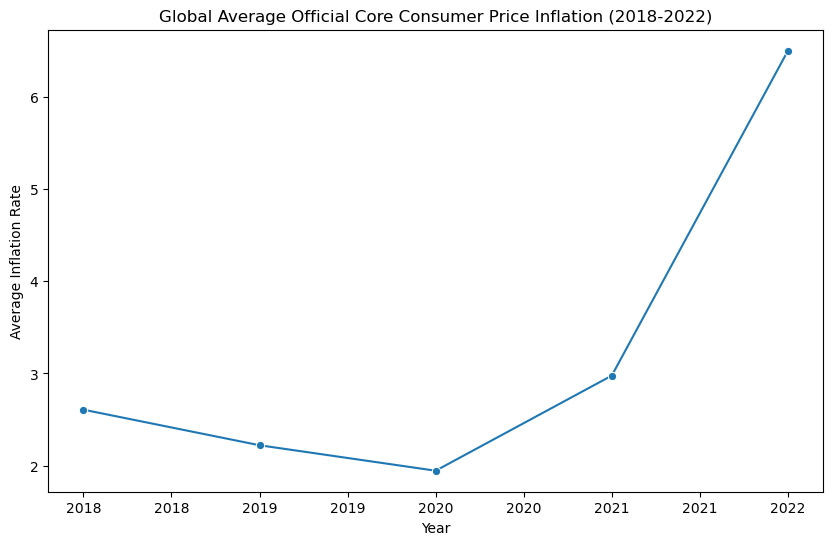

In [33]:
# Line chart for the average energy consumer price inflation of DataFrame #4
# The data visualization is only from 2018 to 2022 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Selecting the columns needed from energy_consumer_df 
official_core_consumer_df = official_core_consumer_df[["2018", "2019", "2020", "2021", "2022"]]

# Dropping any missing values 
official_core_consumer_df = official_core_consumer_df.dropna(how='any')

# Resetting the index 
official_core_consumer_df = official_core_consumer_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = official_core_consumer_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Average Official Core Consumer Price Inflation (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()

In [34]:
# DATAFRAME 5: Producer Price Inflation 

# Selecting the columns needed for the df 
producer_inflation_df = global_inflation_by_continent_df[(global_inflation_by_continent_df["Series Name"] == "Producer Price Inflation")]
[["Country Code", "Country", "Continent", "Sub Region", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013",
  "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]

# Dropping the Series Name given that the power point would have the title 
producer_inflation_df = producer_inflation_df.drop(columns=["Series Name"])

# Dropping any missing values 
producer_inflation_df = producer_inflation_df.dropna(how='any')

# Resetting the index 
producer_inflation_df = producer_inflation_df.reset_index(drop=True)

producer_inflation_df.head()

,Country Code,Country,Continent,Sub Region,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ARM,Armenia,Asia,Western Asia,3.59,8.86,20.97,7.58,0.92,0.65,...,4.72,8.47,-0.77,1.51,2.16,0.08,0.63,2.98,9.87,3.54
1,AUS,Australia,Oceania,Australia and New Zealand,0.22,-1.23,7.66,6.04,6.14,2.29,...,-0.50,-3.47,-4.94,-1.43,8.49,5.21,1.01,-3.71,5.74,6.74
2,AUT,Austria,Europe,Western Europe,-1.14,-0.06,1.73,3.10,1.69,2.77,...,-0.88,-1.10,-1.48,-1.83,1.96,2.38,0.11,-1.59,7.95,19.89
3,BEL,Belgium,Europe,Western Europe,0.22,-1.23,7.66,6.04,6.14,2.29,...,-0.50,-3.47,-2.00,-1.42,8.49,5.21,1.02,-3.71,17.34,38.21
4,BGR,Bulgaria,Europe,Eastern Europe,1.29,4.94,5.97,8.11,12.89,7.57,...,-1.63,-1.25,-1.98,-3.11,4.98,3.95,3.07,-1.90,15.29,38.76


In [35]:
# Verifying there are no missing values  for DataFrame #5

producer_inflation_df.count()

Country Code    66
Country         66
Continent       66
Sub Region      66
2002            66
2003            66
2004            66
2005            66
2006            66
2007            66
2008            66
2009            66
2010            66
2011            66
2012            66
2013            66
2014            66
2015            66
2016            66
2017            66
2018            66
2019            66
2020            66
2021            66
2022            66
dtype: int64

In [36]:
# Descriptive statistics for DataFrame #6 

producer_inflation_df.describe().round(2)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,...,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00
mean,3.20,4.55,6.59,5.99,6.59,4.70,10.07,-3.03,6.34,8.32,...,0.31,0.71,-0.79,0.01,4.33,4.52,2.18,1.16,11.03,21.08
std,8.62,7.92,5.60,4.62,5.82,4.87,7.44,5.46,7.08,5.73,...,2.55,4.05,6.75,4.53,4.30,4.70,4.60,9.10,9.18,18.52
min,-6.91,-8.09,-3.27,-2.57,0.79,-4.82,-1.39,-22.05,-4.93,-1.20,...,-7.57,-7.37,-20.52,-8.02,-0.93,-1.77,-3.57,-10.16,-1.78,3.54
25%,-0.77,-0.04,2.60,3.18,3.66,2.24,4.66,-5.50,2.25,4.72,...,-1.06,-1.46,-3.82,-2.28,1.97,2.08,0.13,-2.50,5.87,10.76
50%,0.23,2.52,5.72,5.26,5.69,3.28,8.08,-3.30,4.22,7.12,...,0.00,-0.54,-1.74,-1.17,3.15,3.32,1.10,-0.54,8.91,16.74
75%,3.60,5.55,7.91,7.57,7.28,6.16,12.71,-0.24,7.55,9.46,...,1.60,2.38,1.04,0.46,5.04,5.21,2.54,1.79,13.39,24.92
max,50.11,38.92,23.36,23.70,42.68,21.85,36.84,11.33,38.45,29.95,...,6.00,17.17,35.69,20.92,26.45,27.01,29.17,56.14,43.86,130.85


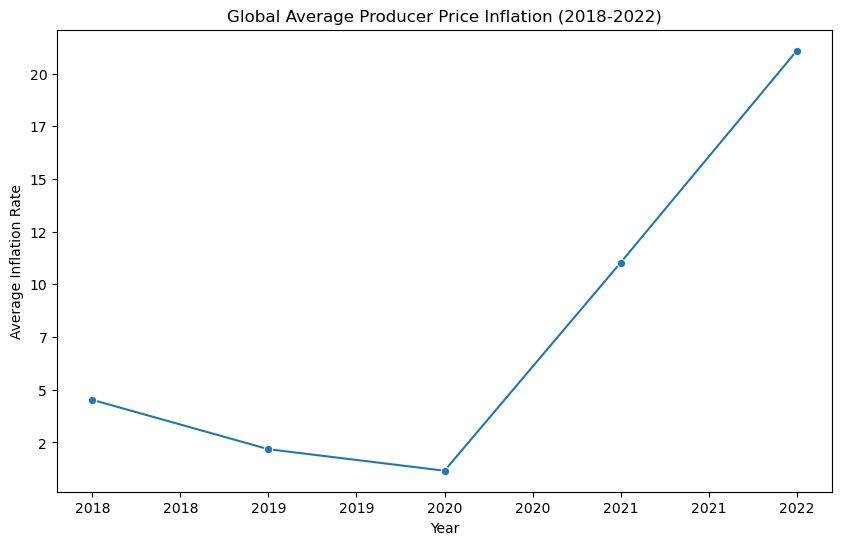

In [37]:
# Line chart for the average energy consumer price inflation of DataFrame #5
# The data visualization is only from 2018 to 2022 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Selecting the columns needed from energy_consumer_df 
producer_inflation_df = producer_inflation_df[["2018", "2019", "2020", "2021", "2022"]]

# Dropping any missing values 
producer_inflation_df = producer_inflation_df.dropna(how='any')

# Resetting the index 
producer_inflation_df = producer_inflation_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = producer_inflation_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Average Producer Price Inflation (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()

In [38]:
# DATAFRAME 6: Main Table 

# Selecting the columns needed for the df 
country_code_df = country_continent_df[["Country Code", "Country", "Continent", "Sub Region"]]

# Dropping any missing values 
country_code_df = country_code_df.dropna(how='any')

# Resetting the index 
country_code_df = country_code_df.reset_index(drop=True)

country_code_df.head()

,Country Code,Country,Continent,Sub Region
0,AFG,Afghanistan,Asia,Southern Asia
1,ALA,Åland Islands,Europe,Northern Europe
2,ALB,Albania,Europe,Southern Europe
3,DZA,Algeria,Africa,Northern Africa
4,ASM,American Samoa,Oceania,Polynesia


In [39]:
# Exporting 6 DataFrames files as CSV files with the header

# Exporting DataFrame #1
energy_consumer_df.to_csv("Output/energy_consumer_price_inflation.csv", index=False, header=True)

# Exporting DataFrame #2
food_consumer_df.to_csv("Output/food_consumer_price_inflation.csv", index=False, header=True)

# Exporting DataFrame #3
headline_consumer_df.to_csv("Output/headline_consumer_price_inflation.csv", index=False, header=True)

# Exporting DataFrame #4
official_core_consumer_df.to_csv("Output/official_core_consumer_price_inflation.csv", index=False, header=True)

# Exporting DataFrame #5
producer_inflation_df.to_csv("Output/producer_price_inflation.csv", index=False, header=True)

# Exporting DataFrame #6
country_code_df.to_csv("Output/country_codes.csv", index=False, header=True)

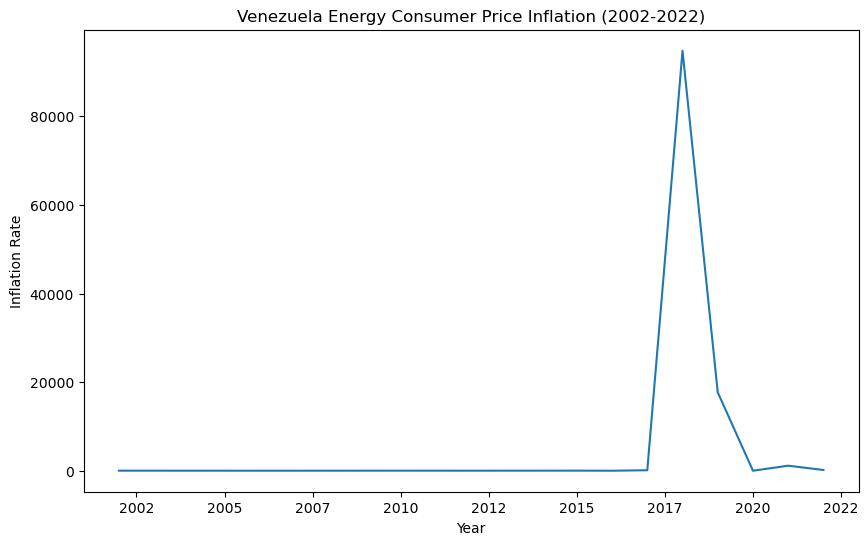

Linear Regression Predictions for 2023-2024: [15497.692      16412.75698701]
Actual Inflation Rate for 2022: 164.09
The inflation rate is predicted to be higher in 2023.
The inflation rate is predicted to be higher in 2024.


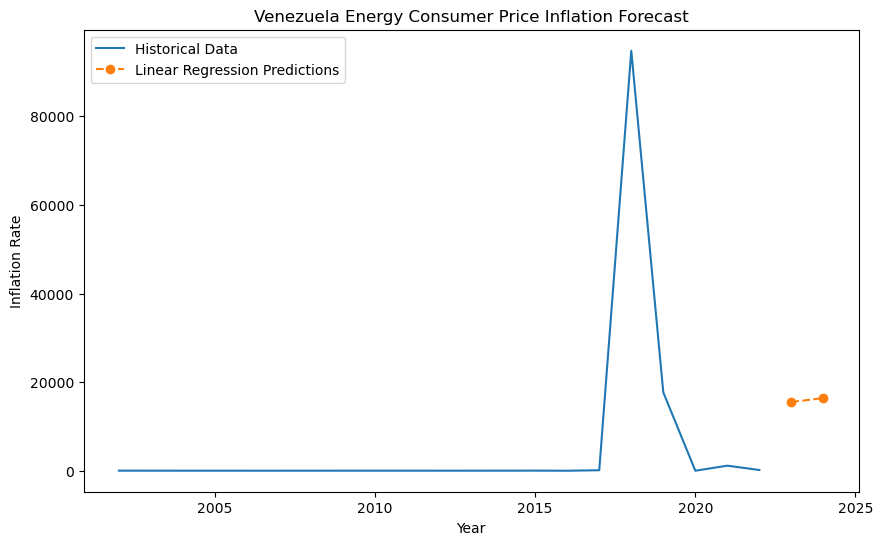

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Assuming global_inflation_by_continent_df is already defined and loaded with the relevant data

# Filter the data for Venezuela
venezuela_data = global_inflation_by_continent_df[
    global_inflation_by_continent_df['Country'] == 'Venezuela (Bolivarian Republic of)'
].copy()

# Choose the series we are interested in
series_name = 'Energy Consumer Price Inflation'
series_data = venezuela_data[venezuela_data['Series Name'] == series_name]

# Select the relevant columns (years 2002-2022)
years = [str(year) for year in range(2002, 2023)]
data_sklearn = series_data[years].T  # Turn the years into rows
data_sklearn.reset_index(inplace=True)  # Reset the index
data_sklearn.columns = ['year', 'inflation_rate']
data_sklearn['year'] = data_sklearn['year'].astype(int)  # Change the years into integer format

# Convert infinite values to NaN
data_sklearn.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop NaN values if any exist
data_sklearn.dropna(inplace=True)

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate')
plt.title('Venezuela Energy Consumer Price Inflation (2002-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()

# Prepare the data for linear regression
X = data_sklearn[['year']]
y = data_sklearn['inflation_rate']

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Make future predictions
future_years = pd.DataFrame({'year': [2023, 2024]})
predictions_lr = model_lr.predict(future_years)

# Print the predictions
print("Linear Regression Predictions for 2023-2024:", predictions_lr)

# Compare with 2022 value
inflation_2022 = data_sklearn[data_sklearn['year'] == 2022]['inflation_rate'].values[0]
print("Actual Inflation Rate for 2022:", inflation_2022)

if predictions_lr[0] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2023.")
else:
    print("The inflation rate is predicted to be lower in 2023.")

if predictions_lr[1] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2024.")
else:
    print("The inflation rate is predicted to be lower in 2024.")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', label='Historical Data')
plt.plot(future_years['year'], predictions_lr, label='Linear Regression Predictions', linestyle='--', marker='o')
plt.title('Venezuela Energy Consumer Price Inflation Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.legend()
plt.show()

Linear Regression Predictions for 2023-2024: [15497.692      16412.75698701]
Actual Inflation Rate for 2022: 164.09
The inflation rate is predicted to be higher in 2023.
The inflation rate is predicted to be higher in 2024.


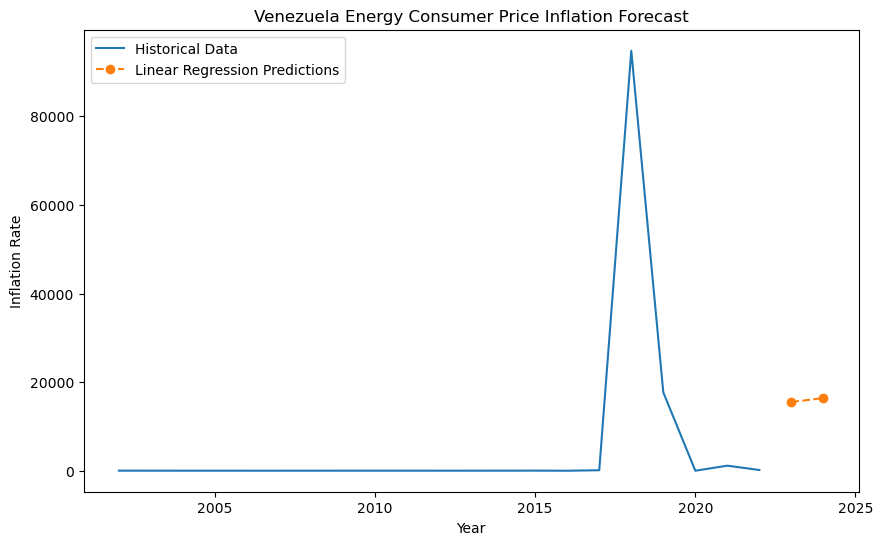

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
X = data_sklearn[['year']]
y = data_sklearn['inflation_rate']

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Make future predictions
future_years = pd.DataFrame({'year': [2023, 2024]})
predictions_lr = model_lr.predict(future_years)

# Print the predictions
print("Linear Regression Predictions for 2023-2024:", predictions_lr)

# Compare with 2022 value
inflation_2022 = data_sklearn[data_sklearn['year'] == 2022]['inflation_rate'].values[0]
print("Actual Inflation Rate for 2022:", inflation_2022)

if predictions_lr[0] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2023.")
else:
    print("The inflation rate is predicted to be lower in 2023.")

if predictions_lr[1] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2024.")
else:
    print("The inflation rate is predicted to be lower in 2024.")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', label='Historical Data')
plt.plot(future_years['year'], predictions_lr, label='Linear Regression Predictions', linestyle='--', marker='o')
plt.title('Venezuela Energy Consumer Price Inflation Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.legend()
plt.show()

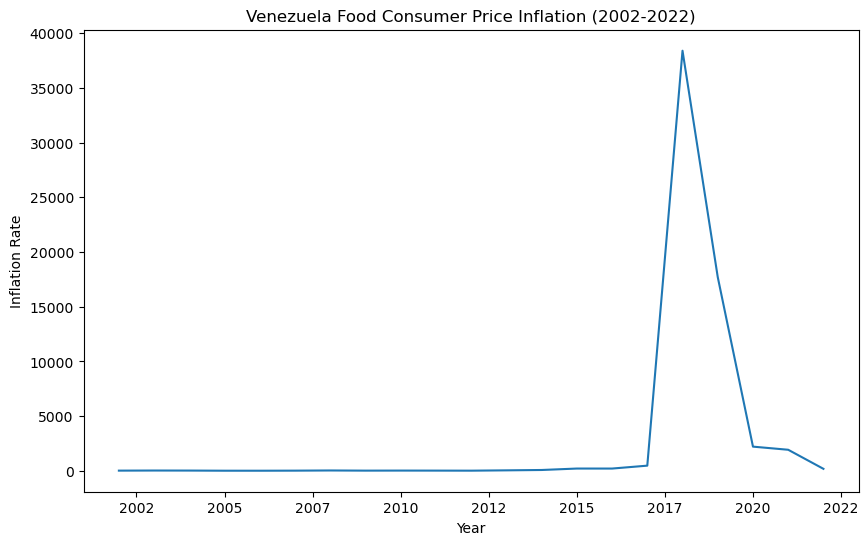

Linear Regression Predictions for 2023-2024: [8571.80585714 9083.39301299]
Actual Inflation Rate for 2022: 193.71
The inflation rate is predicted to be higher in 2023.
The inflation rate is predicted to be higher in 2024.


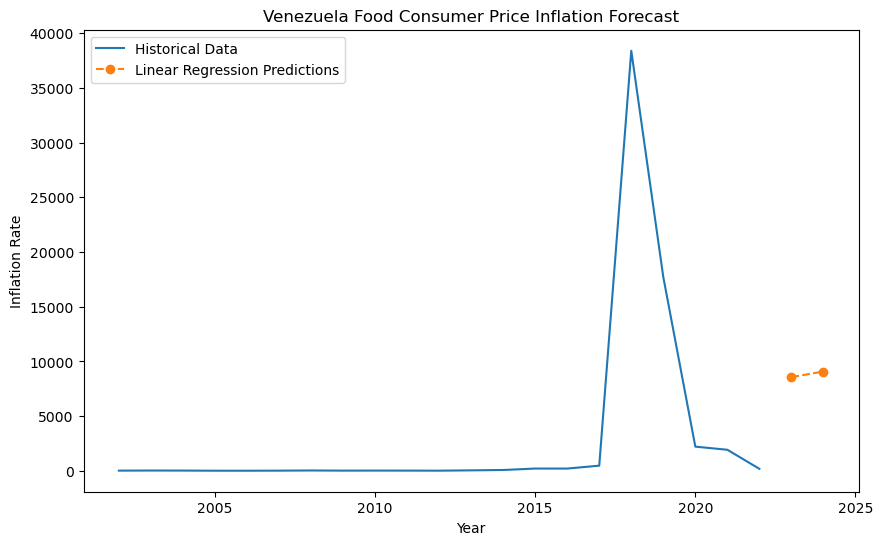

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Assuming global_inflation_by_continent_df is already defined and loaded with the relevant data

# Filter the data for Venezuela
venezuela_data = global_inflation_by_continent_df[
    global_inflation_by_continent_df['Country'] == 'Venezuela (Bolivarian Republic of)'
].copy()

# Choose the series we are interested in
series_name = 'Food Consumer Price Inflation'
series_data = venezuela_data[venezuela_data['Series Name'] == series_name]

# Select the relevant columns (years 2002-2022)
years = [str(year) for year in range(2002, 2023)]
data_sklearn = series_data[years].T  # Turn the years into rows
data_sklearn.reset_index(inplace=True)  # Reset the index
data_sklearn.columns = ['year', 'inflation_rate']
data_sklearn['year'] = data_sklearn['year'].astype(int)  # Change the years into integer format

# Convert infinite values to NaN
data_sklearn.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop NaN values if any exist
data_sklearn.dropna(inplace=True)

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate')
plt.title('Venezuela Food Consumer Price Inflation (2002-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()

# Prepare the data for linear regression
X = data_sklearn[['year']]
y = data_sklearn['inflation_rate']

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Make future predictions
future_years = pd.DataFrame({'year': [2023, 2024]})
predictions_lr = model_lr.predict(future_years)

# Print the predictions
print("Linear Regression Predictions for 2023-2024:", predictions_lr)

# Compare with 2022 value
inflation_2022 = data_sklearn[data_sklearn['year'] == 2022]['inflation_rate'].values[0]
print("Actual Inflation Rate for 2022:", inflation_2022)

if predictions_lr[0] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2023.")
else:
    print("The inflation rate is predicted to be lower in 2023.")

if predictions_lr[1] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2024.")
else:
    print("The inflation rate is predicted to be lower in 2024.")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', label='Historical Data')
plt.plot(future_years['year'], predictions_lr, label='Linear Regression Predictions', linestyle='--', marker='o')
plt.title('Venezuela Food Consumer Price Inflation Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.legend()
plt.show()


Linear Regression Predictions for 2023-2024: [8571.80585714 9083.39301299]
Actual Inflation Rate for 2022: 193.71
The inflation rate is predicted to be higher in 2023.
The inflation rate is predicted to be higher in 2024.


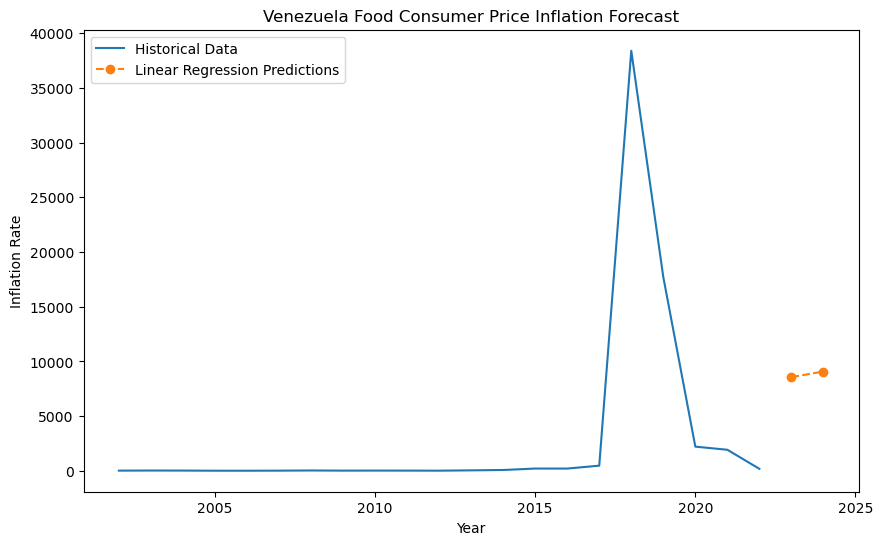

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
X = data_sklearn[['year']]
y = data_sklearn['inflation_rate']

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Make future predictions
future_years = pd.DataFrame({'year': [2023, 2024]})
predictions_lr = model_lr.predict(future_years)

# Print the predictions
print("Linear Regression Predictions for 2023-2024:", predictions_lr)

# Compare with 2022 value
inflation_2022 = data_sklearn[data_sklearn['year'] == 2022]['inflation_rate'].values[0]
print("Actual Inflation Rate for 2022:", inflation_2022)

if predictions_lr[0] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2023.")
else:
    print("The inflation rate is predicted to be lower in 2023.")
if predictions_lr[1] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2024.")
else:
    print("The inflation rate is predicted to be lower in 2024.")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', label='Historical Data')
plt.plot(future_years['year'], predictions_lr, label='Linear Regression Predictions', linestyle='--', marker='o')
plt.title('Venezuela Food Consumer Price Inflation Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.legend()
plt.show()

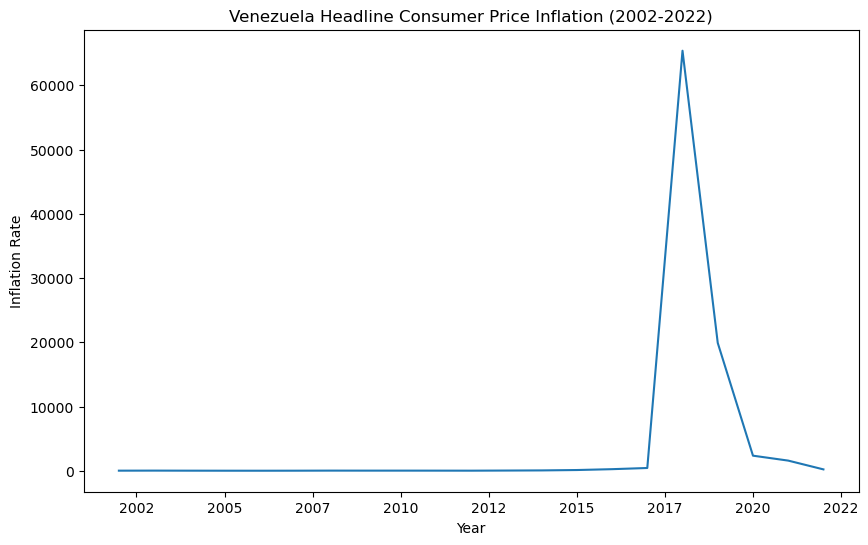

Linear Regression Predictions for 2023-2024: [12449.69004762 13189.19624242]
Actual Inflation Rate for 2022: 220.84
The inflation rate is predicted to be higher in 2023.
The inflation rate is predicted to be higher in 2024.


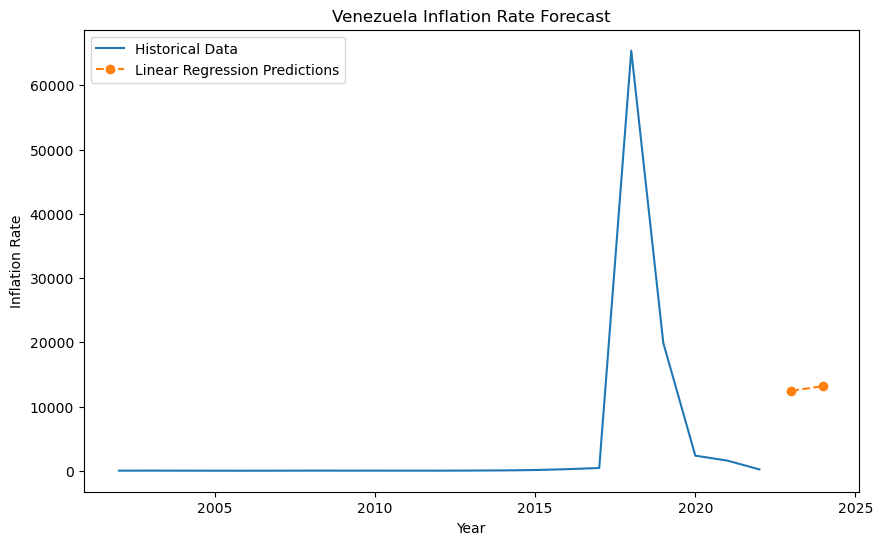

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Assuming global_inflation_by_continent_df is already defined and loaded with the relevant data

# Filter the data for Venezuela
venezuela_data = global_inflation_by_continent_df[
    global_inflation_by_continent_df['Country'] == 'Venezuela (Bolivarian Republic of)'
].copy()

# Choose the series we are interested in
series_name = 'Headline Consumer Price Inflation'
series_data = venezuela_data[venezuela_data['Series Name'] == series_name]

# Select the relevant columns (years 2002-2022)
years = [str(year) for year in range(2002, 2023)]
data_sklearn = series_data[years].T  # Turn the years into rows
data_sklearn.reset_index(inplace=True)  # Reset the index
data_sklearn.columns = ['year', 'inflation_rate']
data_sklearn['year'] = data_sklearn['year'].astype(int)  # Change the years into integer format

# Convert infinite values to NaN
data_sklearn.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop NaN values if any exist
data_sklearn.dropna(inplace=True)

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate')
plt.title('Venezuela Headline Consumer Price Inflation (2002-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.show()

# Prepare the data for linear regression
X = data_sklearn[['year']]
y = data_sklearn['inflation_rate']

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Make future predictions
future_years = pd.DataFrame({'year': [2023, 2024]})
predictions_lr = model_lr.predict(future_years)

# Print the predictions
print("Linear Regression Predictions for 2023-2024:", predictions_lr)

# Compare with 2022 value
inflation_2022 = data_sklearn[data_sklearn['year'] == 2022]['inflation_rate'].values[0]
print("Actual Inflation Rate for 2022:", inflation_2022)

if predictions_lr[0] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2023.")
else:
    print("The inflation rate is predicted to be lower in 2023.")

if predictions_lr[1] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2024.")
else:
    print("The inflation rate is predicted to be lower in 2024.")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', label='Historical Data')
plt.plot(future_years['year'], predictions_lr, label='Linear Regression Predictions', linestyle='--', marker='o')
plt.title('Venezuela Inflation Rate Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.legend()
plt.show()

Linear Regression Predictions for 2023-2024: [12449.69004762 13189.19624242]
Actual Inflation Rate for 2022: 220.84
The inflation rate is predicted to be higher in 2023.
The inflation rate is predicted to be higher in 2024.


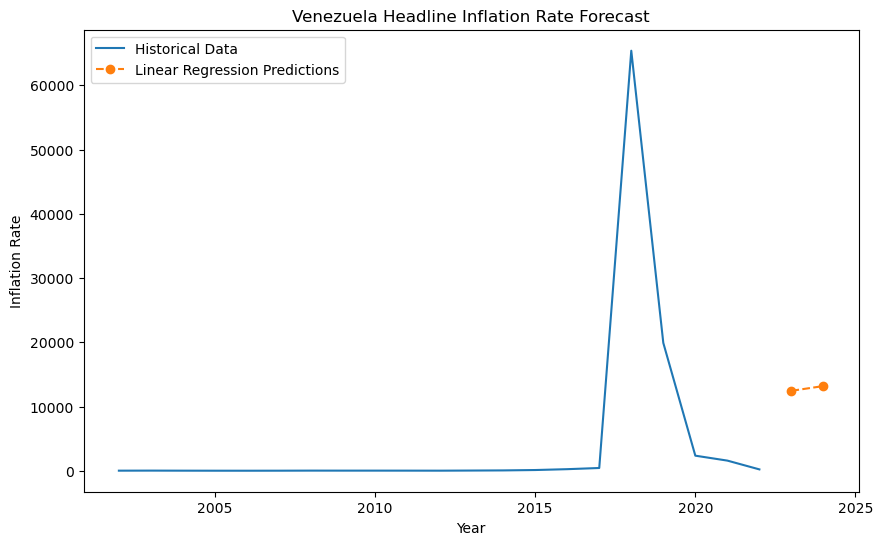

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
X = data_sklearn[['year']]
y = data_sklearn['inflation_rate']

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Make future predictions
future_years = pd.DataFrame({'year': [2023, 2024]})
predictions_lr = model_lr.predict(future_years)

# Print the predictions
print("Linear Regression Predictions for 2023-2024:", predictions_lr)

# Compare with 2022 value
inflation_2022 = data_sklearn[data_sklearn['year'] == 2022]['inflation_rate'].values[0]
print("Actual Inflation Rate for 2022:", inflation_2022)

if predictions_lr[0] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2023.")
else:
    print("The inflation rate is predicted to be lower in 2023.")

if predictions_lr[1] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2024.")
else:
    print("The inflation rate is predicted to be lower in 2024.")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', label='Historical Data')
plt.plot(future_years['year'], predictions_lr, label='Linear Regression Predictions', linestyle='--', marker='o')
plt.title('Venezuela Headline Inflation Rate Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.legend()
plt.show()

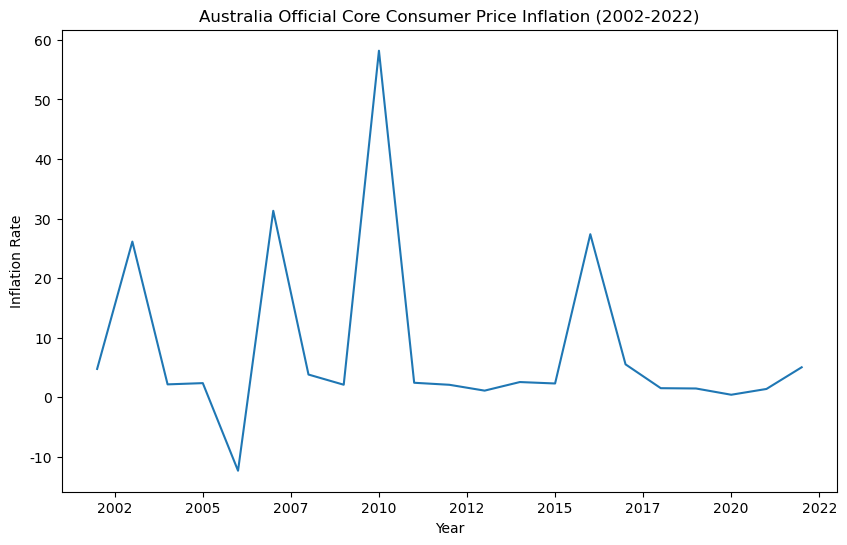

Linear Regression Predictions for 2023-2024: [3.85766667 3.46360173]
Actual Inflation Rate for 2022: 5.05
The inflation rate is predicted to be lower in 2023.
The inflation rate is predicted to be lower in 2024.


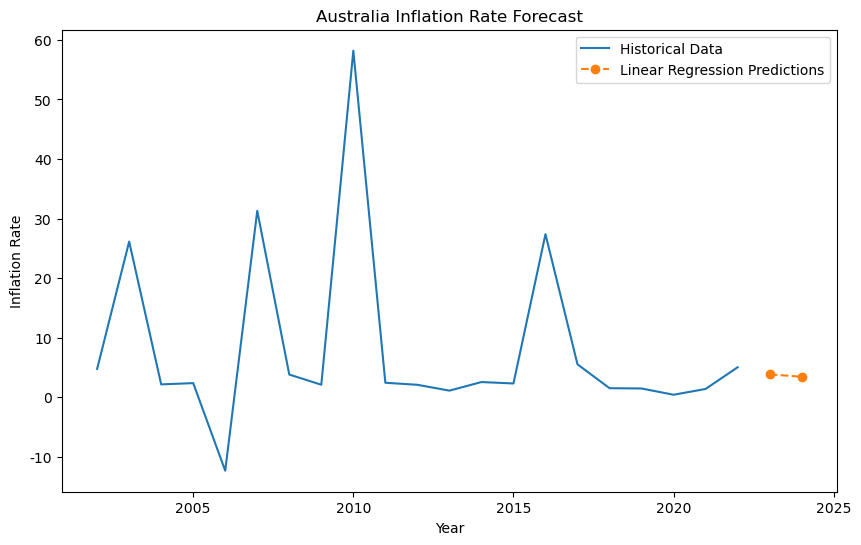

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Assuming global_inflation_by_continent_df is already defined and loaded with the relevant data

# Filter the data for Australia
australia_data = global_inflation_by_continent_df[
    global_inflation_by_continent_df['Country'] == 'Australia'
].copy()

# Choose the series we are interested in
series_name = 'Official Core Consumer Price Inflation'
series_data = australia_data[australia_data['Series Name'] == series_name]

# Select the relevant columns (years 2002-2022)
years = [str(year) for year in range(2002, 2023)]
data_sklearn = series_data[years].T  # Turn the years into rows
data_sklearn.reset_index(inplace=True)  # Reset the index
data_sklearn.columns = ['year', 'inflation_rate']
data_sklearn['year'] = data_sklearn['year'].astype(int)  # Change the years into integer format

# Convert infinite values to NaN
data_sklearn.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop NaN values if any exist
data_sklearn.dropna(inplace=True)

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate')
plt.title('Australia Official Core Consumer Price Inflation (2002-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.show()

# Prepare the data for linear regression
X = data_sklearn[['year']]
y = data_sklearn['inflation_rate']

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Make future predictions
future_years = pd.DataFrame({'year': [2023, 2024]})
predictions_lr = model_lr.predict(future_years)

# Print the predictions
print("Linear Regression Predictions for 2023-2024:", predictions_lr)

# Compare with 2022 value
inflation_2022 = data_sklearn[data_sklearn['year'] == 2022]['inflation_rate'].values[0]
print("Actual Inflation Rate for 2022:", inflation_2022)

if predictions_lr[0] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2023.")
else:
    print("The inflation rate is predicted to be lower in 2023.")

if predictions_lr[1] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2024.")
else:
    print("The inflation rate is predicted to be lower in 2024.")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', label='Historical Data')
plt.plot(future_years['year'], predictions_lr, label='Linear Regression Predictions', linestyle='--', marker='o')
plt.title('Australia Inflation Rate Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.legend()
plt.show()

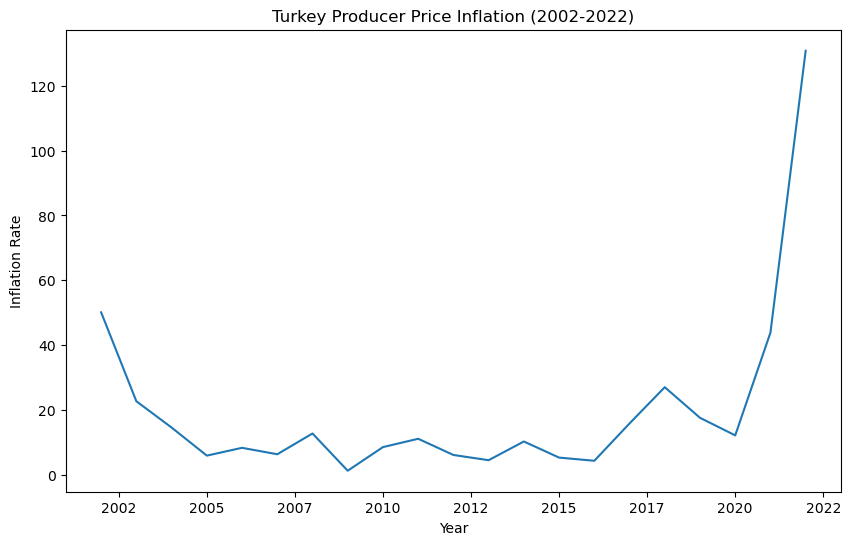

Linear Regression Predictions for 2023-2024: [37.03385714 38.58654545]
Actual Inflation Rate for 2022: 130.85
The inflation rate is predicted to be lower in 2023.
The inflation rate is predicted to be lower in 2024.


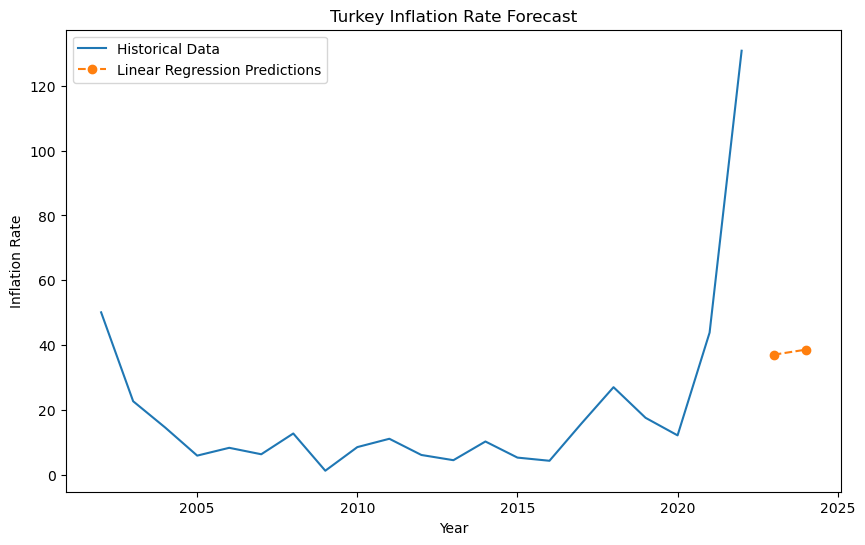

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

# Assuming global_inflation_by_continent_df is already defined and loaded with the relevant data

# Filter the data for Australia
turkey_data = global_inflation_by_continent_df[
    global_inflation_by_continent_df['Country'] == 'Turkey'
].copy()

# Choose the series we are interested in
series_name = 'Producer Price Inflation'
series_data = turkey_data[turkey_data['Series Name'] == series_name]

# Select the relevant columns (years 2002-2022)
years = [str(year) for year in range(2002, 2023)]
data_sklearn = series_data[years].T  # Turn the years into rows
data_sklearn.reset_index(inplace=True)  # Reset the index
data_sklearn.columns = ['year', 'inflation_rate']
data_sklearn['year'] = data_sklearn['year'].astype(int)  # Change the years into integer format

# Convert infinite values to NaN
data_sklearn.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop NaN values if any exist
data_sklearn.dropna(inplace=True)

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate')
plt.title('Turkey Producer Price Inflation (2002-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.show()

# Prepare the data for linear regression
X = data_sklearn[['year']]
y = data_sklearn['inflation_rate']

# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Make future predictions
future_years = pd.DataFrame({'year': [2023, 2024]})
predictions_lr = model_lr.predict(future_years)

# Print the predictions
print("Linear Regression Predictions for 2023-2024:", predictions_lr)

# Compare with 2022 value
inflation_2022 = data_sklearn[data_sklearn['year'] == 2022]['inflation_rate'].values[0]
print("Actual Inflation Rate for 2022:", inflation_2022)

if predictions_lr[0] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2023.")
else:
    print("The inflation rate is predicted to be lower in 2023.")

if predictions_lr[1] > inflation_2022:
    print("The inflation rate is predicted to be higher in 2024.")
else:
    print("The inflation rate is predicted to be lower in 2024.")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', label='Historical Data')
plt.plot(future_years['year'], predictions_lr, label='Linear Regression Predictions', linestyle='--', marker='o')
plt.title('Turkey Inflation Rate Forecast')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.legend()
plt.show()

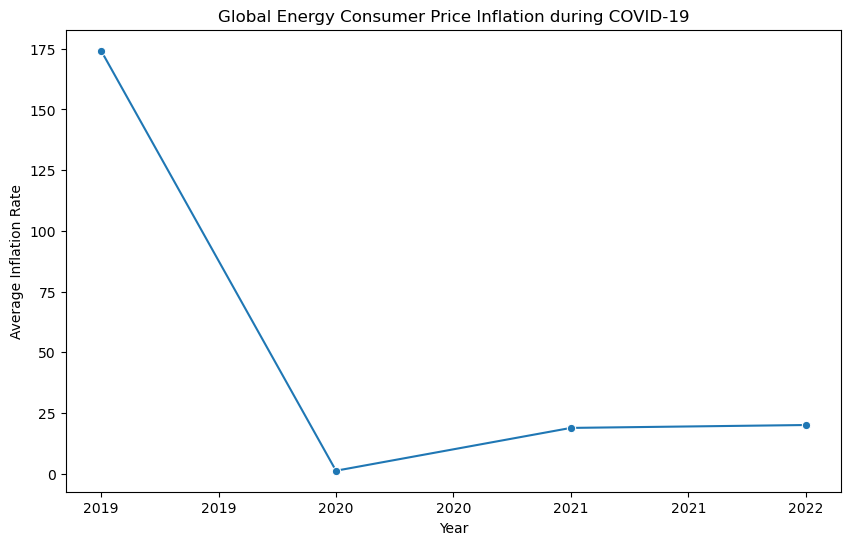

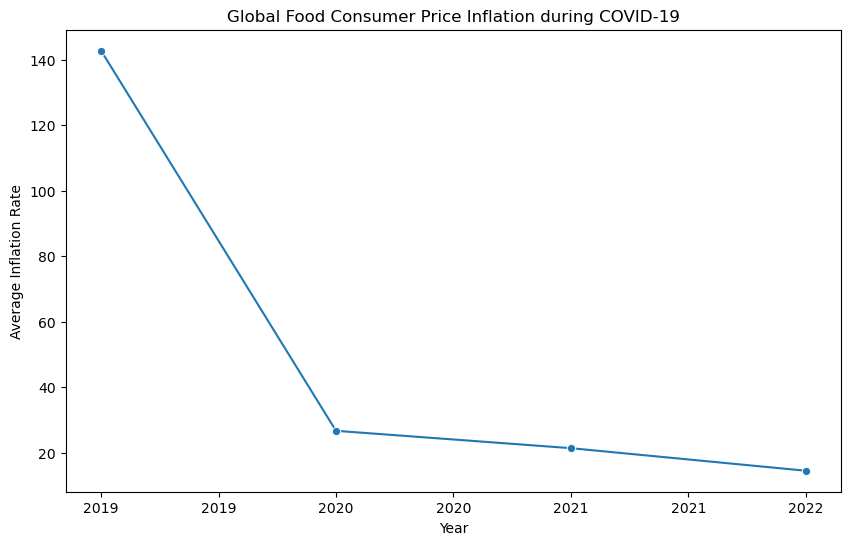

In [48]:
# Descriptive statistics global on COVID-19 from 2019 to 2022
# DataFrame #1 and #2

### DataFrame #1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Selecting the columns needed from energy_consumer_df 
energy_consumer_df = energy_consumer_df[["2019", "2020", "2021", "2022"]]

# Dropping any missing values 
energy_consumer_df = energy_consumer_df.dropna(how='any')

# Resetting the index 
energy_consumer_df = energy_consumer_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = energy_consumer_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Energy Consumer Price Inflation during COVID-19')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()


### DataFrame #2

# Selecting the columns needed from food_consumer_df 
food_consumer_df = food_consumer_df[["2019", "2020", "2021", "2022"]]

# Dropping any missing values 
food_consumer_df = food_consumer_df.dropna(how='any')

# Resetting the index 
food_consumer_df = food_consumer_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = food_consumer_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Food Consumer Price Inflation during COVID-19')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()





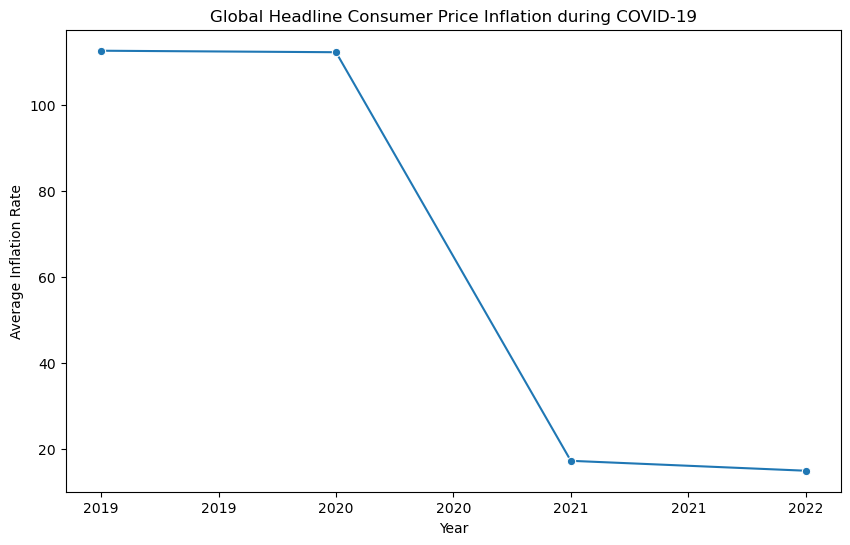

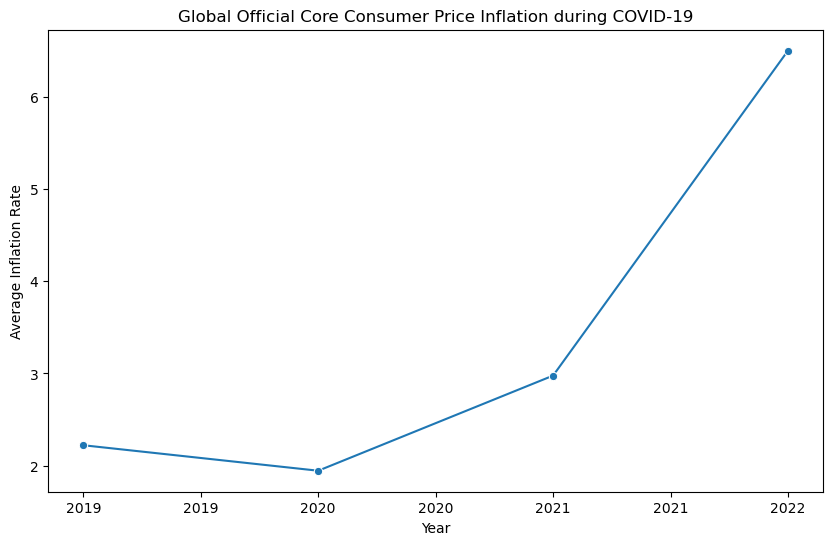

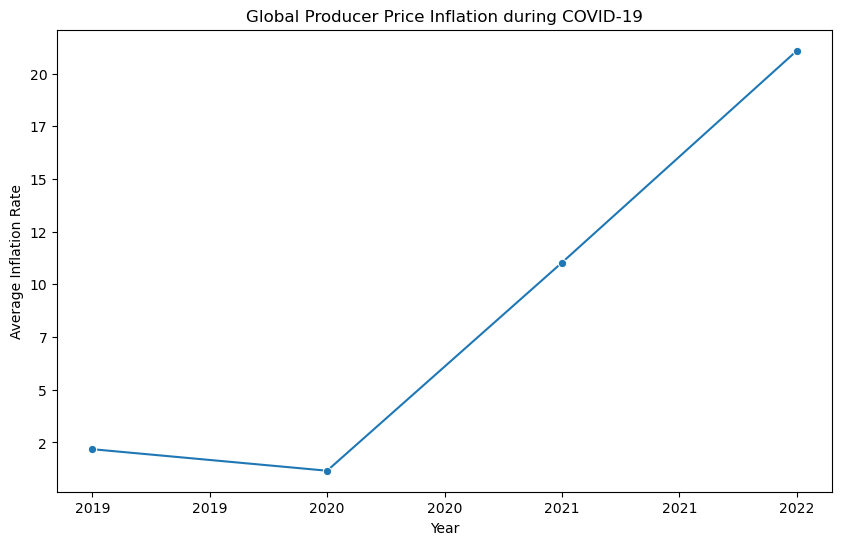

In [49]:
# Descriptive statistics global on COVID-19 from 2019 to 2022
# DataFrame #3, #4, and #5

### DataFrame #3

# Selecting the columns needed from headline_consumer_df 
headline_consumer_df = headline_consumer_df[["2019", "2020", "2021", "2022"]]

# Dropping any missing values 
headline_consumer_df = headline_consumer_df.dropna(how='any')

# Resetting the index 
headline_consumer_df = headline_consumer_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = headline_consumer_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Headline Consumer Price Inflation during COVID-19')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()

### DataFrame #4

# Selecting the columns needed from official_core_consumer_df 
official_core_consumer_df = official_core_consumer_df[["2019", "2020", "2021", "2022"]]

# Dropping any missing values 
official_core_consumer_df = official_core_consumer_df.dropna(how='any')

# Resetting the index 
official_core_consumer_df = official_core_consumer_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = official_core_consumer_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Official Core Consumer Price Inflation during COVID-19')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()


### DataFrame #5

# Selecting the columns needed from producer_inflation_df 
producer_inflation_df = producer_inflation_df[["2019", "2020", "2021", "2022"]]

# Dropping any missing values 
producer_inflation_df = producer_inflation_df.dropna(how='any')

# Resetting the index 
producer_inflation_df = producer_inflation_df.reset_index(drop=True)

# Calculating the average inflation rate for each year
average_inflation = producer_inflation_df.mean()

# Preparing the data for plotting
data_sklearn = pd.DataFrame({
    'year': average_inflation.index.astype(int),
    'inflation_rate': average_inflation.values
})

# Function to format ticks as integers
def format_ticks(value, tick_number):
    return f'{int(value)}'

# Plot the historical data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sklearn, x='year', y='inflation_rate', marker='o')
plt.title('Global Producer Price Inflation during COVID-19')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate')

# Apply the formatter to the x and y axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.show()